In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as sps
plt.style.use('ggplot')
from sympy import *
from copy import copy
from scipy.optimize import curve_fit
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import GridSearchCV
%matplotlib inline
def scan_from_csv(filename):
    return pd.read_csv(filename,na_values='None')

def write_answer_to_file(answer,file):
    with open(file, 'w') as answer_file:  
        answer_file.write(answer)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
Train = scan_from_csv('train.tsv')
Test = scan_from_csv('test.tsv')

In [7]:
Train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,1,20441997,2230.0,18817.0,20110.0,26368.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,1,20441990,5695.0,47480.0,47619.0,89708.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,1,20441989,1995.0,17146.0,20066.0,27070.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,1,20441988,6515.0,49262.0,50045.0,95167.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0


In [8]:
Test

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0
5,348627,2015,3,3,20443943,57289.0,80036.0,112511.0,116002.0,171900.0,...,122340.0,50368.0,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0
6,348628,2015,3,3,20443941,21868.0,30620.0,45886.0,49732.0,75195.0,...,77370.0,40930.0,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0
7,348629,2015,3,3,20443902,41105.0,57637.0,54540.0,68171.0,64825.0,...,102330.0,36506.0,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0
8,348630,2015,3,3,20443901,39381.0,56933.0,59899.0,67243.0,58880.0,...,106168.0,37908.0,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0
9,348631,2015,3,3,20443308,5922.0,16070.0,14665.0,10640.0,20150.0,...,4081.0,1660.0,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0


In [9]:
np.max(Train['week']),np.min(Train['week'])

(53, 1)

In [297]:
def get_times(fr):
    return np.array(fr['year'])*53 + (np.array(fr['week']) - 1) + np.array(fr['shift'])

def get_real_times(fr):
    return np.array(fr['year'])*53 + (np.array(fr['week']) - 1)

def print_cluster_field(train,_id,field='y',time_shift=1,norm=False,offset=0):
    trainC = train[train['item_id'] == _id][train['shift'] == time_shift]
#     trainC[('year','week','shift')].head()
    data = np.array(trainC[field])
    print(np.mean(data), np.std(data))
    if norm:
        data = (data - np.mean(data))/np.std(data)
    timeC = get_real_times(trainC)
    prepared = []
#     print(len(np.unique(timeC)), len(timeC))
    for i in range(len(timeC)):
        prepared.append((timeC[i],data[i]))
#     prepared = np.array(prepared)
    prepared = np.array(sorted(prepared))
    ox = prepared[:,0]
    oy = prepared[:,1]
    plt.plot(ox-offset,oy,label=field)

1579.55555556 916.071769925
1593.94392523 908.114332953
1608.79245283 899.366629514


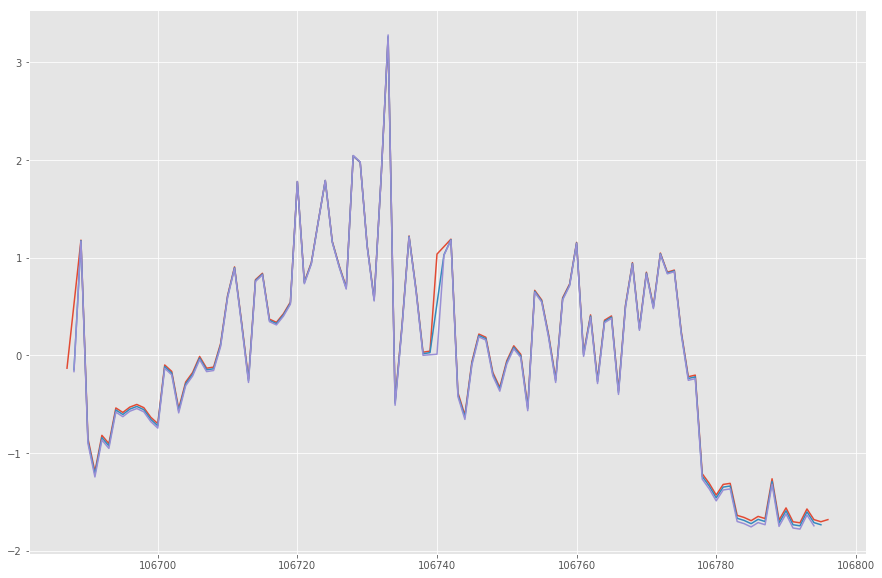

In [14]:
plt.figure(figsize=(15,10))
_id = 20438923
print_cluster_field(Train,_id,'f30',1,True)
print_cluster_field(Train,_id,'f30',2,True,1)
print_cluster_field(Train,_id,'f30',3,True,2)
# print_cluster_field(Test,_id,'f30',3,False)

как видно нормированный параметр f30 почти совпадает с нормированным таргетом. Поэтому приблизим ответ на тесте как нормированное f30 сдвинутое на оптимальное расстояние.

In [15]:
def smape(y_pred,y_true):
    if len(y_pred) != len(y_true):
        raise Exception('bad lens')
    y_pred = np.array([max(0,x) for x in y_pred])
    y_true = np.array(y_true)
    return 100/len(y_pred)* np.sum(np.abs(y_pred - y_true)/(np.abs(y_pred) + np.abs(y_true))*2)

def save_ans(_y_test, filename):
    ans = pd.DataFrame(data=np.matrix(_y_test).T, columns=['y'])
    ans = pd.concat((pd.DataFrame(Test['Num'],columns=['Num']),ans),axis=1)
    ans.to_csv(filename,index=None)

In [16]:
set([tuple(x) for x  in np.array(Test[['shift','week']])])

{(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5)}

столбец shift означает, что у нас есть данные за shift недель назад, то есть за все недели которые нужно предсказать кроме 5 недели. То есть примерно 2/3 тестовых ответом можно получить простой переномрировкой f30. А последнюю неделю видимо придется предсказывать честно, с помощью регрессии на стационарных гауссовских процессах(используется свой написанный класс).

In [ ]:
class GaussianProcessRegression:
    
    def __init__(self, cov_function):
        self.cov_function = cov_function
    
    
    def fit(self, T, X):
        self.T = T
        self.Cinv = [[self.cov_function(ti - tj) for tj in T] for ti in T]
        self.Cinv = np.matrix(self.Cinv).I
        self.X = np.matrix(X).T
        
        return self
        
        
    def predict(self, T):
        R = np.array([np.matrix([self.cov_function(t-ti) for ti in self.T]).T for t in T])
        values = np.array([float(r.T*self.Cinv*self.X) for r in R])
        sigma = np.array([float(self.cov_function(np.zeros_like(T[0])) - r.T*self.Cinv*r) for r in R])
        
        return values, sigma

если посмотреть на некоторые графики цен для конкретных item_id по времени, то не заметен какой либо глобальный тренд роста(МНК дает наклон почти 0), поэтому нормированные данные можно в приближении считать стацинарным гауссовским процессом. Самый важный шаг - подбор автокорреляционной функции, так как в ней содержится вся информация о локальных зависимостях. В качестве такой функции возьмем функцию из семейства $ae^{-\frac{|t|}{s^2}}cos(2\pi ft)$. И подберем для нее параметры исходя из выборочной корреляции с помощью curve_fit.

В конце полученные данные ответы можно смешать с xgoost в нескольких соотношениях 

(1,0) - 13.93 ,

(0,1),

(0.5, 0.5)

и по параболе взять лучший коэффицент.

In [105]:
def emp_cov_gen(_data,C=500):
    maxx = len(_data)
    f = [np.mean([_data[j]*_data[j+i] for j in range(len(_data)-i)]) for i in range(maxx)]
    # Ex_i = 0 в предположении стационарности и несмещенности
    def cov(t): 
        t = abs(t)
        if t >= min(C,maxx):
            return 0
        return float(f[t])
    return cov

<function matplotlib.pyplot.show>

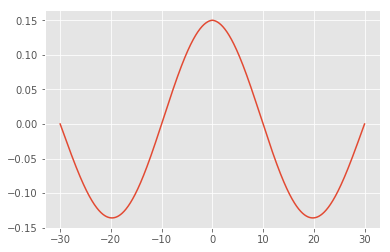

In [262]:
def exp_cov(x, a, s,f):
    return a * np.exp(-np.abs(x).sum(axis=-1)/(2 * s ** 2)) * np.cos(2*np.pi*f*x.sum(axis=-1))
grid = np.linspace(-30, 30, 1000)
plt.figure(figsize=(6, 4))
plt.plot(grid, exp_cov(grid.reshape((-1, 1)),a=0.15, s=10,f=0.025))
plt.show

In [411]:
def get_last_prediction(data, M, D):
    S = 1
    if len(data) <= S:
        return np.mean(data[-2:])*D + M
    
    ox = np.arange(len(data)-S)
    data_mean_row = np.array([np.mean(data[i:i+S]) for i in range(len(data)-S)])
    regr = LinearRegression()
    regr.fit(ox.reshape((len(ox),1)), data_mean_row)
    data_mean = data_mean_row  - np.array(regr.predict(ox.reshape((len(ox),1))))
    
    DV = 2
    cov = emp_cov_gen(data_mean,len(data_mean)//DV)
    simx = np.arange(-len(ox)//DV,len(ox)//DV)
    simy = [cov(x) for x in np.arange(-len(ox)//DV,len(ox)//DV)]
    try:
        popt,pcov = curve_fit(exp_cov,simx,simy,bounds=(0, [0.15,10,0.025]))
    except:
        popt = [cov(0),10,0.025]
    covv = (lambda x: exp_cov(x,a=popt[0],s=popt[1],f=popt[2]))
#     plt.plot(simx, simy,label='real')
#     plt.plot(simx, [covv(x) for x in simx],label='approx')
#     plt.legend(loc='best')
#     plt.show()
#     plt.title('data')
    clf = GaussianProcessRegression(cov_function=covv)
    clf.fit(ox,data_mean)
    pred_mean = float(clf.predict([len(ox)])[0])
    pred_mean_rov = pred_mean + float(regr.predict([len(ox)])[0])
    pred_final = pred_mean_rov
    oxz = np.arange(len(data))
#     plt.plot(oxz,data)
#     plt.plot([len(oxz),0],[pred_final,pred_final],color='blue')
#     plt.show()
    
    return pred_final*D + M

In [412]:
wh = dict()
last_prediction = dict()
groups = dict()

__bads = []

def cleared(a,_id, _shift):
    return a[a['item_id'] == _id][a['shift'] == _shift]

def get_best_claster_f(train, test, _id, _shift):
    train,test = cleared(train,_id, _shift),cleared(test,_id, _shift)
    dict_y = dict()
    X_train_f30 = np.array(np.matrix(np.array(train['f30'])).T)
    y_train = np.array(train['y'])
    X_test_f30 = np.array(np.matrix(np.array(test['f30'])).T)
    X_f30 = np.concatenate((X_train_f30,X_test_f30),axis=0)
    times_train = get_real_times(train)
    times_test = get_real_times(test)
    times = np.concatenate((times_train,times_test),axis=0)
    Mf30,Df30 = np.mean(X_train_f30), np.std(X_train_f30)
    My, Dy = np.mean(y_train), np.std(y_train)
    if _shift == 1:
        groups[_id] = (X_f30 - Mf30)/Df30
        last_prediction[_id] = get_last_prediction(groups[_id],My,Dy)
    for i in range(len(times_test)):
        t = times_test[i] - _shift
        wh[(_id,t)] = (X_test_f30[i] - Mf30)/Df30 * Dy + My

def f(_id,_t):
    v = wh.setdefault((_id,_t), -100500)
    if v == -100500:
        return last_prediction[_id]
    else:
        return float(wh[(_id,_t)])

        
def get_clf(train,test):
    clasters = dict()
    for i in np.unique(test['item_id']):
        for j in np.unique(train['shift']):
            clasters[(i,j)] = get_best_claster_f(train, test, i,j)
    def claster_clf(X_test):
        ans = []
        Obs = np.array(X_test[['item_id','shift']])
        Times = get_real_times(X_test)
        print(Obs.shape,Times.shape)
        for i in range(len(Obs)):
            val = max(0,f(Obs[i][0],Times[i]))
            ans.append(val)
        return np.array(ans)
    return claster_clf

In [413]:
%%time
claster_clf = get_clf(Train,Test)

CPU times: user 46.1 s, sys: 633 ms, total: 46.8 s
Wall time: 48.6 s


In [414]:
y_trained = claster_clf(Test)
print(y_trained)
# print(smape(Train['y'],y_trained))
# save_ans(y_test,'hack_with_clasters_to_item_and_shift_1_arg')

(2016, 2) (2016,)
[   1480.96359123   27241.65528074  299651.71532985 ...,   16964.02431242
     307.81795299    6433.45154298]


In [415]:
y_test = claster_clf(Test)
save_ans(y_test,'hack_with_clasters_to_item_and_shift_to_real_data_with_fixed_time_and_gauss_exp_cov_func_and_not_linear_trand')

(2016, 2) (2016,)
